In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble._forest import RandomForestRegressor
# import Library
def randomForest(trainFeatures, trainResponses, testFeatures, maxFeatures = 'log2', nTree=100):
    ## Settings of random forests regressor
    regModel = RandomForestRegressor(n_estimators=nTree, max_features=maxFeatures)    
    ## Train the random forests regressor
    regModel.fit(trainFeatures, trainResponses)
    ## Prediction
    testResponsesPred = regModel.predict(testFeatures)
    importances = regModel.feature_importances_
    return regModel, testResponsesPred,importances



array([0.00150949, 0.0292508 , 0.08400307, 0.05720369, 0.17443306,
       0.0841942 , 0.09293183, 0.02471769, 0.10030329, 0.09501312,
       0.17904692, 0.07739283])

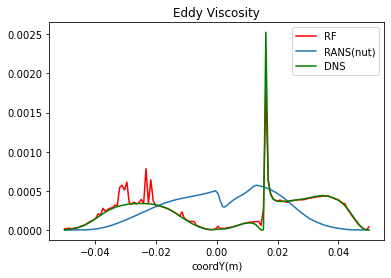

In [3]:
trainFeatures = np.load('./data/trainFeatures.npy')
trainResponse = np.load('./data/trainResponse.npy')
testFeatures = np.load('./data/testFeatures.npy')
RANSTEST = np.load('./data/RANSTEST.npy')
DNSTEST = np.load('./data/DNSTEST.npy')

model,TestResponsesPred ,importances= randomForest(trainFeatures, trainResponse, testFeatures, 10, 200)


x = np.linspace(-0.05,0.05,128)
plt.plot(x,TestResponsesPred,label = 'RF',color = 'r')
plt.plot(x,RANSTEST,label = 'RANS(nut)')
plt.plot(x,DNSTEST,label = 'DNS',color = 'g')
plt.xlabel('coordY(m)')
plt.title('Eddy Viscosity')
plt.legend()
importances